In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt 
from scipy.fftpack import fft,ifft
from scipy.io import wavfile



### 1.  Implement a function to compute power spectrogram. (1 point)

In [6]:
# Read audio
sample_rate, audio_data = wavfile.read('audio1.wav')

# Normalize audio
audio_data = audio_data / np.max(np.abs(audio_data))

# Set parameters
time_axis = np.arange(0, len(audio_data) / sample_rate, 1 / sample_rate)
win_size = int(sample_rate * 0.1)  # 100 ms window
window = np.hamming(win_size)
hop_size = int(win_size / 2)  # 50% overlap
nfft = win_size
nframes = int((len(audio_data) - win_size) / hop_size)

# Initialize the power spectrogram
power_spectrogram = np.zeros((int(nfft / 2), nframes))

# Loop through the frames
for i in np.arange(0, nframes):
    # Select audio frame
    segment = audio_data[i * hop_size:(i * hop_size + win_size)]
    
    # a) Multiply each signal frame with a windowing function
    segment_wind = segment * window
    
    # DFT spectrum
    spectrum = fft(segment_wind, nfft)
    magnitude_spectrum = np.abs(spectrum[0:int(nfft / 2)])
    
    # c) Collect the power spectrum into a matrix
    power_spectrum = magnitude_spectrum ** 2
    power_spectrogram[:, i] = power_spectrum

#### Plot the matrix (power_spectrogram) as an image.

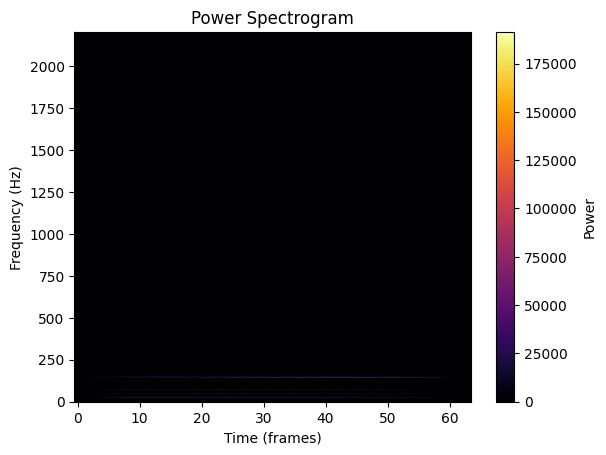

In [7]:
plt.figure()
plt.imshow(power_spectrogram, aspect='auto', origin='lower', cmap='inferno')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Power')
plt.title('Power Spectrogram')
plt.show()

#### Plot the logarithm of the matrix.

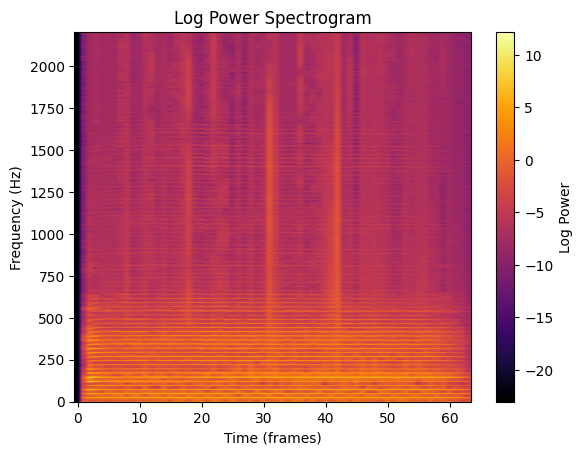

In [8]:
plt.figure()
plt.imshow(np.log(power_spectrogram + 1e-10), aspect='auto', origin='lower', cmap='inferno')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Log Power')
plt.title('Log Power Spectrogram')
plt.show()

#### What differences do you observe?

The logarithmic power spectrogram shows greater detal, provides us with more usable information, and is more relatable to what a normal person can hear in the audio.

### 2.  Analyse the effect of window size on the spectrum. (1 point)

#### a) Calculate spectrogram with librosa and nfft=window size

#### Are there any differences from your own implementation?

#### b) Apply your implementation with different window sizes (16ms, 32ms, 64ms and 128ms) to different signals (audio1, audio2 and synthetic sinusoids from exercise 1)

#### Note. You can define your implementation from problem 1 as a function and call it for each of the signals.

#### c) What happens when the window size is increased?

#### What analysis window lenght is best for each of the signal types?

### Bonus problem: Implement overlap-add reconstruction